In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv')
df.head(5)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

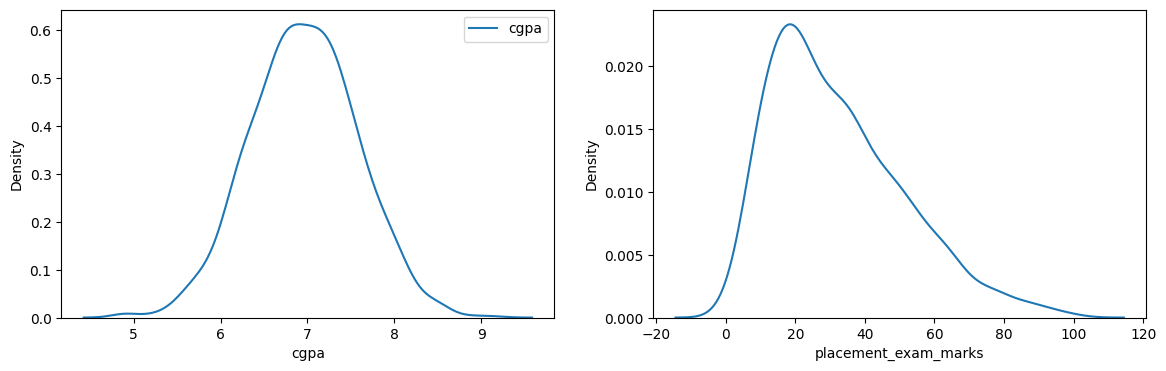

In [4]:
plt.figure(figsize = (14,4))
plt.subplot(122)
sns.kdeplot(df['placement_exam_marks'] , label = 'placement_exam_marks')
plt.subplot(121)
sns.kdeplot(df['cgpa'] , label = 'cgpa')
plt.legend()
plt.show()

In [5]:
np.round(df['placement_exam_marks'].describe() , 1)

count    1000.0
mean       32.2
std        19.1
min         0.0
25%        17.0
50%        28.0
75%        44.0
max       100.0
Name: placement_exam_marks, dtype: float64

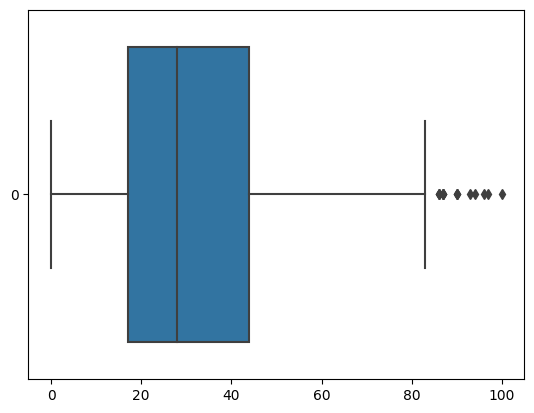

In [11]:
# Creating box plot for skewed distribution

sns.boxplot(df['placement_exam_marks'] ,orient = 'h' )
plt.show()

In [15]:
#Finding IQR

percentile_25 = df['placement_exam_marks'].quantile(0.25)
percentile_75 = df['placement_exam_marks'].quantile(0.75)

IQR = percentile_75 - percentile_25
print('IQR is ', IQR)

IQR is  27.0


In [16]:
upper_limit = percentile_75 + 1.5 * IQR
lower_limit = percentile_25 - 1.5 * IQR

In [17]:
# Finding outliers

df[(df['placement_exam_marks'] > upper_limit)|(df['placement_exam_marks'] < lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [21]:
new_df = df[(df['placement_exam_marks'] < upper_limit) & (df['placement_exam_marks'] > lower_limit)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


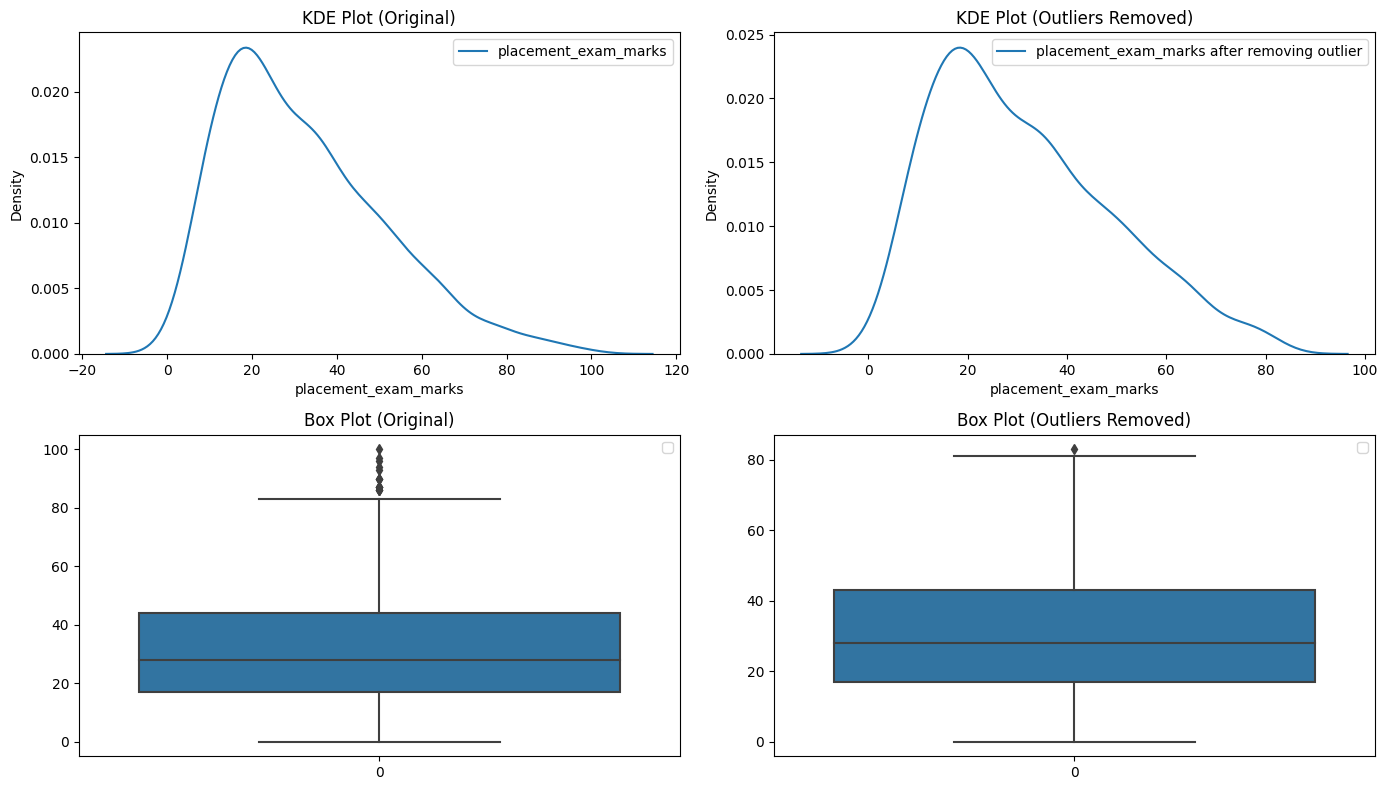

In [29]:
plt.figure(figsize = (14,8))
plt.subplot(221)
sns.kdeplot(df['placement_exam_marks'] , label = 'placement_exam_marks')
plt.title("KDE Plot (Original)")
plt.legend()

plt.subplot(222)
sns.kdeplot(new_df['placement_exam_marks'] , label = 'placement_exam_marks after removing outlier')
plt.title("KDE Plot (Outliers Removed)")
plt.legend()

plt.subplot(223)
sns.boxplot(df['placement_exam_marks'])
plt.title("Box Plot (Original)")
plt.legend()

plt.subplot(224)
sns.boxplot(new_df['placement_exam_marks'])
plt.title("Box Plot (Outliers Removed)")
plt.legend()

plt.tight_layout()
plt.show()


In [33]:
# Capping

new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    
    )
    

)

In [34]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


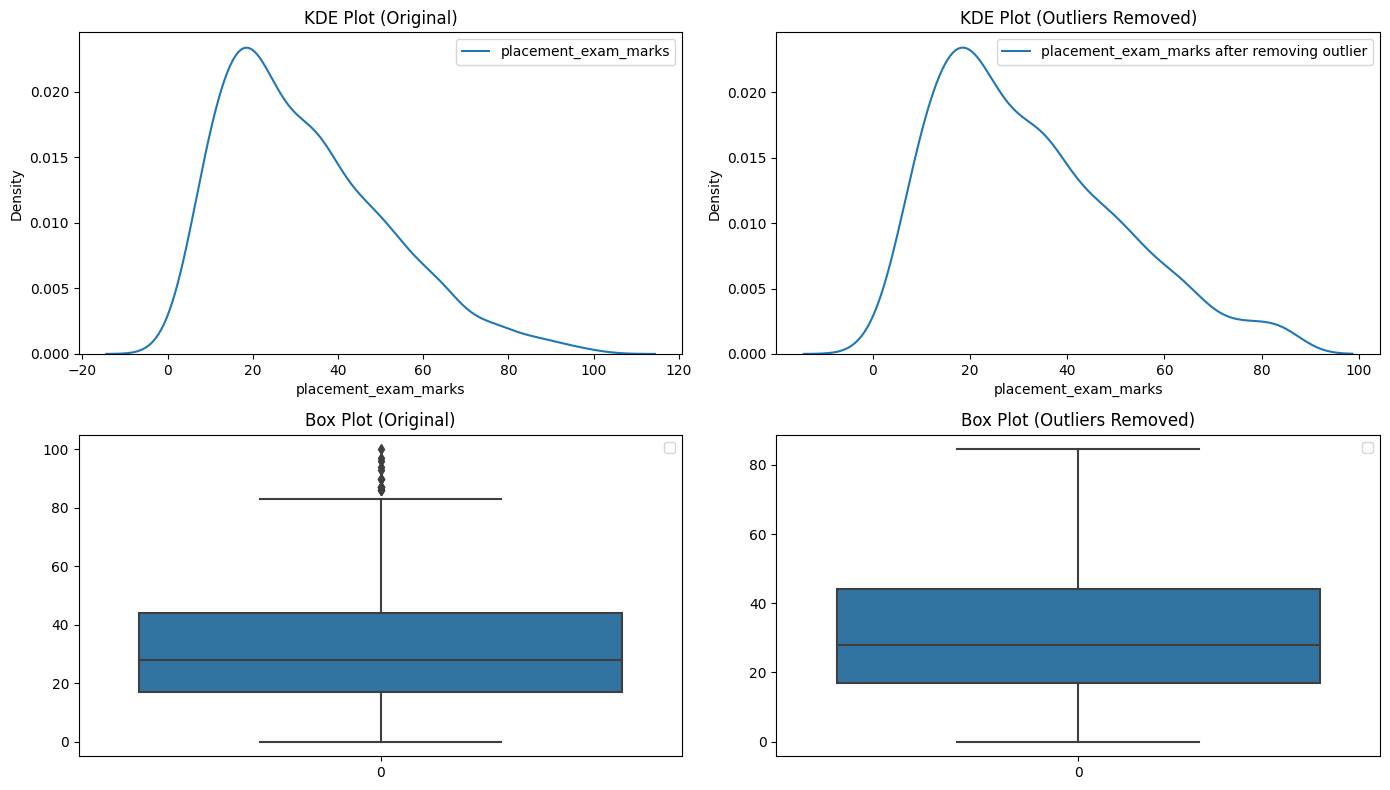

In [35]:
plt.figure(figsize = (14,8))
plt.subplot(221)
sns.kdeplot(df['placement_exam_marks'] , label = 'placement_exam_marks')
plt.title("KDE Plot (Original)")
plt.legend()

plt.subplot(222)
sns.kdeplot(new_df_cap['placement_exam_marks'] , label = 'placement_exam_marks after removing outlier')
plt.title("KDE Plot (Outliers Removed)")
plt.legend()

plt.subplot(223)
sns.boxplot(df['placement_exam_marks'])
plt.title("Box Plot (Original)")
plt.legend()

plt.subplot(224)
sns.boxplot(new_df_cap['placement_exam_marks'])
plt.title("Box Plot (Outliers Removed)")
plt.legend()

plt.tight_layout()
plt.show()
